# Sentence Similarity using sentence-transformers/all-MiniLM-L6-v2

In [3]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2', cache_dir='models/')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

D:\dev\miniconda\envs\transformersHug\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\workspace\pytorch\mistralBot\models\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Sentence embeddings:
tensor([[ 6.7657e-02,  6.3496e-02,  4.8713e-02,  7.9305e-02,  3.7448e-02,
          2.6528e-03,  3.9375e-02, -7.0984e-03,  5.9361e-02,  3.1537e-02,
          6.0098e-02, -5.2905e-02,  4.0607e-02, -2.5931e-02,  2.9843e-02,
          1.1269e-03,  7.3515e-02, -5.0382e-02, -1.2239e-01,  2.3703e-02,
          2.9727e-02,  4.2477e-02,  2.5634e-02,  1.9952e-03, -5.6919e-02,
         -2.7160e-02, -3.2904e-02,  6.6025e-02,  1.1901e-01, -4.5879e-02,
         -7.2621e-02, -3.2584e-02,  5.2341e-02,  4.5055e-02,  8.2530e-03,
          3.6702e-02, -1.3942e-02,  6.5392e-02, -2.6427e-02,  2.0641e-04,
         -1.3664e-02, -3.6281e-02, -1.9504e-02, -2.8974e-02,  3.9427e-02,
         -8.8409e-02,  2.6242e-03,  1.3671e-02,  4.8306e-02, -3.1157e-02,
         -1.1733e-01, -5.1169e-02, -8.8529e-02, -2.1896e-02,  1.4299e-02,
          4.4417e-02, -1.3481e-02,  7.4339e-02,  2.6638e-02, -1.9876e-02,
          1.7919e-02, -1.0605e-02, -9.0426e-02,  2.1327e-02,  1.4120e-01,
         -6.4717e

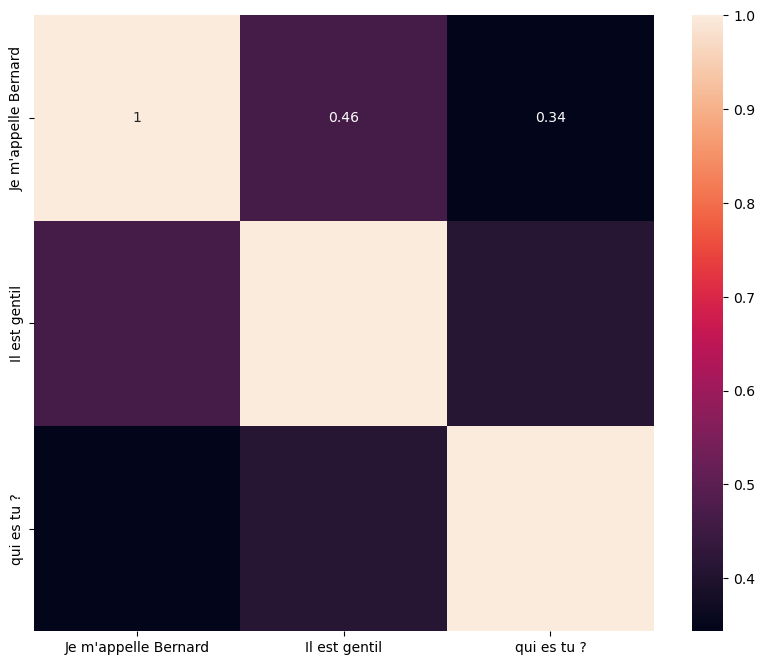

In [7]:
# Takes a list of sentences and returns a list of sentence embeddings
def sentences_to_embeddings(sentences):
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
    return sentence_embeddings

# Sentence similarity
def similarity(sentence1, sentence2):
    sentence1 = sentences_to_embeddings([sentence1])
    sentence2 = sentences_to_embeddings([sentence2])
    return F.cosine_similarity(sentence1, sentence2).item() # cosine similarity
    # or Jacard similarity
    # return len(set(sentence1[0].tolist()).intersection(set(sentence2[0].tolist()))) / len(set(sentence1[0].tolist()).union(set(sentence2[0].tolist())))
    
# Test similarity
import matplotlib.pyplot as plt
import numpy as np
import seaborn
def plot_similarity(sentences):
    n = len(sentences)
    similarity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            similarity_matrix[i, j] = similarity(sentences[i], sentences[j])
    plt.figure(figsize=(10, 8))
    seaborn.heatmap(similarity_matrix, xticklabels=sentences, yticklabels=sentences, annot=True)
    plt.show()

sentences = ["Je m'appelle Bernard", 'Il est gentil', 'qui es tu ?']
plot_similarity(sentences)